In [292]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from warnings import filterwarnings
filterwarnings("ignore")
# display all columns of the dataframe
pd.options.display.max_columns=None
# display all rows of the dataframe
pd.options.display.max_rows=None

## import function from scipy
from scipy import stats
from scipy.stats import shapiro
import statsmodels
import statsmodels.api as sm
import statsmodels.stats.api as sms
from statsmodels.formula.api import ols
from statsmodels.tools.eval_measures import rmse

## metrics from sklearn is used for evaluation the model
#rmse,mse,mae
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

## split the data into train-test split
from sklearn.model_selection import train_test_split

## Problem Statement

The New York City Controller's Office maintains a database of the salary and benefits paid to city employees since the fiscal year 2013. This is data representing the Employee Compensation report.

**Year Type:**		Fiscal (July through June) or Calendar (January through December)<br>

**Year:**		An accounting period of 12 months. The New York City operates operates on a fiscal year that begins on July 1 and ends on June 30 the following year. The Fiscal Year ending June 30, 2012 is represented as FY2011-2012.<br>

**Employee Identifier:**		Each distinct number in the “Employee Identifier” column represents one employee. These identifying numbers are not meaningful but rather are randomly assigned for the purpose of building this dataset.<br>

**Salaries:**		Normal salaries paid to permanent or temporary City employees. <br>

**Overtime:**		Amounts paid to City employees working in excess of 40 hours per week. <br>

**Other Salaries:**		Various irregular payments made to City employees including premium pay, incentive pay, or other one-time payments. <br>

**Total Salary:**		The sum of all salaries paid to City employees.<br>

**Retirement:**		City contributions to employee retirement plans. <br>

**Health/Dental:**		City-paid premiums to health and dental insurance plans covering City employees. To protect confidentiality as legally required, pro-rated citywide averages are presented in lieu of employee-specific health and dental benefits. <br>

**Other Benefits:**		Mandatory benefits paid on behalf of employees, such as Social Security (FICA and Medicare) contributions, unemployment insurance premiums, and minor discretionary benefits not included in the above categories.<br>

**Total Benefits:**		The sum of all benefits paid to City employees.<br>

**Total Compensation:**		The sum of all salaries and benefits paid to City employees.

## 1. read the dataset 

In [296]:
df_compensation=pd.read_csv("employee_compensation.csv")
df_compensation.head()

,Year_Type,Year,Employee_Identifier,Salaries,Overtime,Other_Salaries,Total_Salary,Retirement,Health/Dental,Other_Benefits,Total_Benefits,Total_Compensation
0,Fiscal,2015,42853,92288.22,267.45,267.45,92823.12,20700.20,12500.56,7605.75,40806.51,133629.63
1,Calendar,2015,28248,1466.38,348.23,0.00,1814.61,0.00,442.03,141.59,583.62,2398.23
2,Fiscal,2014,30651,76536.95,13583.72,10855.94,100976.61,18632.19,12464.61,8011.41,39108.21,140084.82
3,Fiscal,2014,19473,45659.88,0.00,1625.37,47285.25,10081.20,0.00,3936.63,14017.83,61303.08
4,Fiscal,2013,7176,41832.00,0.00,0.00,41832.00,7617.60,5908.52,3254.50,16780.62,58612.62


In [297]:
data=df_compensation
data.head()

,Year_Type,Year,Employee_Identifier,Salaries,Overtime,Other_Salaries,Total_Salary,Retirement,Health/Dental,Other_Benefits,Total_Benefits,Total_Compensation
0,Fiscal,2015,42853,92288.22,267.45,267.45,92823.12,20700.20,12500.56,7605.75,40806.51,133629.63
1,Calendar,2015,28248,1466.38,348.23,0.00,1814.61,0.00,442.03,141.59,583.62,2398.23
2,Fiscal,2014,30651,76536.95,13583.72,10855.94,100976.61,18632.19,12464.61,8011.41,39108.21,140084.82
3,Fiscal,2014,19473,45659.88,0.00,1625.37,47285.25,10081.20,0.00,3936.63,14017.83,61303.08
4,Fiscal,2013,7176,41832.00,0.00,0.00,41832.00,7617.60,5908.52,3254.50,16780.62,58612.62


In [298]:
df_compensation.shape## to check the number of rows and columns

(50000, 12)

In [299]:
df_compensation.dtypes## to check the datatypes of columns

Year_Type               object
Year                     int64
Employee_Identifier      int64
Salaries               float64
Overtime               float64
Other_Salaries         float64
Total_Salary           float64
Retirement             float64
Health/Dental          float64
Other_Benefits         float64
Total_Benefits         float64
Total_Compensation     float64
dtype: object

In [300]:
df_compensation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Year_Type            50000 non-null  object 
 1   Year                 50000 non-null  int64  
 2   Employee_Identifier  50000 non-null  int64  
 3   Salaries             50000 non-null  float64
 4   Overtime             50000 non-null  float64
 5   Other_Salaries       50000 non-null  float64
 6   Total_Salary         50000 non-null  float64
 7   Retirement           50000 non-null  float64
 8   Health/Dental        50000 non-null  float64
 9   Other_Benefits       50000 non-null  float64
 10  Total_Benefits       50000 non-null  float64
 11  Total_Compensation   50000 non-null  float64
dtypes: float64(9), int64(2), object(1)
memory usage: 4.6+ MB


In [301]:
df_compensation["Year"]=df_compensation["Year"].astype(object)

In [302]:
## remove unwanted columns from dataset
df_compensation.drop("Employee_Identifier",axis=1,inplace=True)

In [303]:
df_compensation.head(1)

,Year_Type,Year,Salaries,Overtime,Other_Salaries,Total_Salary,Retirement,Health/Dental,Other_Benefits,Total_Benefits,Total_Compensation
0,Fiscal,2015,92288.22,267.45,267.45,92823.12,20700.2,12500.56,7605.75,40806.51,133629.63


In [304]:
## check the null values
df_compensation.isnull().sum()

Year_Type             0
Year                  0
Salaries              0
Overtime              0
Other_Salaries        0
Total_Salary          0
Retirement            0
Health/Dental         0
Other_Benefits        0
Total_Benefits        0
Total_Compensation    0
dtype: int64

In [305]:
# check the outlier of data
num_cols=df_compensation.select_dtypes(np.number)
num_cols.columns

Index(['Salaries', 'Overtime', 'Other_Salaries', 'Total_Salary', 'Retirement',
       'Health/Dental', 'Other_Benefits', 'Total_Benefits',
       'Total_Compensation'],
      dtype='object')

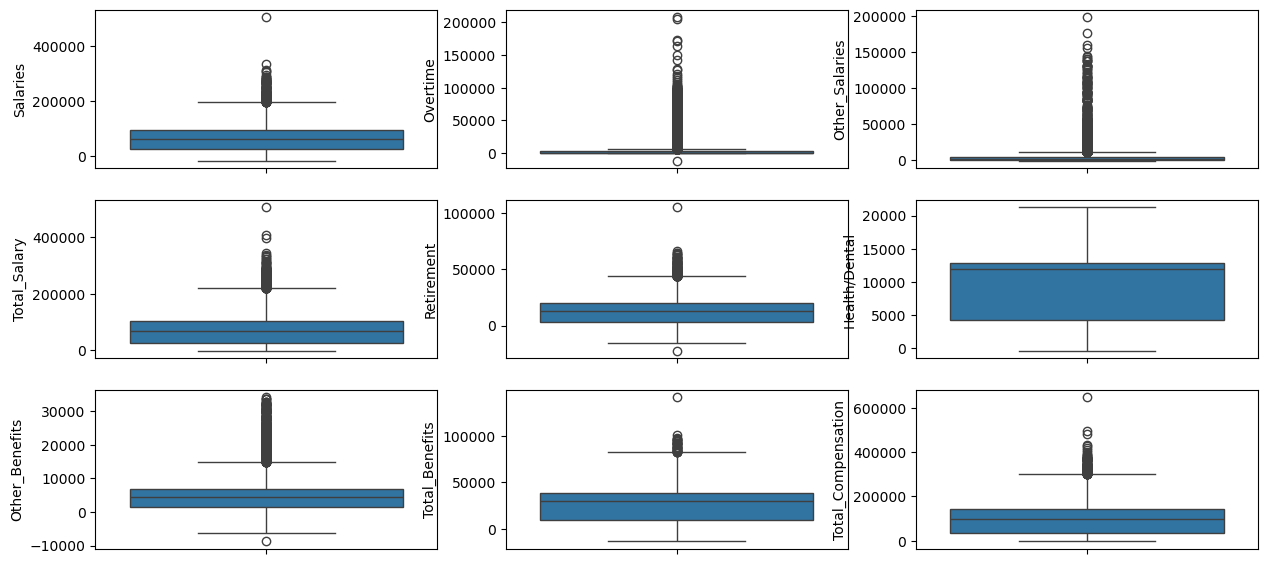

In [306]:
t=1
plt.figure(figsize=(15,7))
for i in num_cols.columns:
    plt.subplot(3,3,t)
    sns.boxplot(df_compensation[i])
    t=t+1
plt.show()

In [307]:
# use to iqr to remove the outlier or standardisation(z-score)

In [308]:
q1=num_cols.quantile(0.25)
q3=num_cols.quantile(0.75)
iqr=q3-q1
iqr
lower_tail=q1-1.5*iqr
upper_tail=q3+1.5*iqr
lower_tail,upper_tail

df_compensation=df_compensation[~((num_cols<(q1-1.5*iqr)) | (num_cols>(q3+1.5*iqr))).any(axis=1)]
df_compensation.shape

(37721, 11)

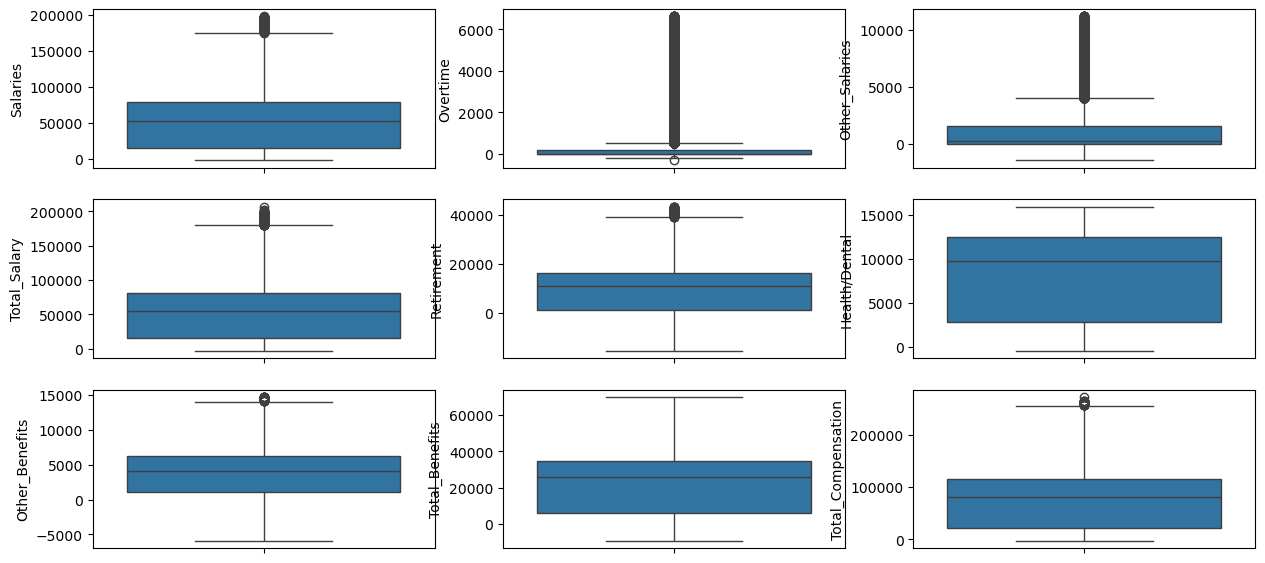

In [309]:
t=1
plt.figure(figsize=(15,7))
for i in num_cols.columns:
    plt.subplot(3,3,t)
    sns.boxplot(df_compensation[i])
    t=t+1
plt.show()

In [310]:
df_compensation.head(1)

,Year_Type,Year,Salaries,Overtime,Other_Salaries,Total_Salary,Retirement,Health/Dental,Other_Benefits,Total_Benefits,Total_Compensation
0,Fiscal,2015,92288.22,267.45,267.45,92823.12,20700.2,12500.56,7605.75,40806.51,133629.63


## scaling the data-->normalize the data
**standardscalar(x-u/std)--->mean=0,std=1**(normalize--(uniform distribution))
**min-max-scaler(x-min/max-min))range(0-1)**(you dont know the shape of your dataset)
skelearn.preprocessing import StandardScaler

age of experience(yrs)      salary(currency)
    10                      250000
    4                       500000
    6                       150000
    

In [312]:
df_compensation.iloc[:,2:10]=df_compensation.iloc[:,2:10].apply(lambda x:(x-x.mean())/x.std())
df_compensation.head()

,Year_Type,Year,Salaries,Overtime,Other_Salaries,Total_Salary,Retirement,Health/Dental,Other_Benefits,Total_Benefits,Total_Compensation
0,Fiscal,2015,0.983488,-0.228091,-0.474919,0.926912,1.178494,0.916565,1.145315,1.160922,133629.63
1,Calendar,2015,-1.252266,-0.167552,-0.587276,-1.263215,-1.180529,-1.491462,-1.259970,-1.365191,2398.23
3,Fiscal,2014,-0.164358,-0.428525,0.095551,-0.168961,-0.031662,-1.579733,-0.037039,-0.521484,61303.08
4,Fiscal,2013,-0.258589,-0.428525,-0.587276,-0.300194,-0.312417,-0.399832,-0.256852,-0.347973,58612.62
5,Calendar,2013,0.536538,-0.428525,0.019113,0.511845,0.511937,0.994002,0.703228,0.731784,109548.84


In [313]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df_compensation["Year_Type"]=le.fit_transform(df_compensation["Year_Type"])
df_compensation.head()

,Year_Type,Year,Salaries,Overtime,Other_Salaries,Total_Salary,Retirement,Health/Dental,Other_Benefits,Total_Benefits,Total_Compensation
0,1,2015,0.983488,-0.228091,-0.474919,0.926912,1.178494,0.916565,1.145315,1.160922,133629.63
1,0,2015,-1.252266,-0.167552,-0.587276,-1.263215,-1.180529,-1.491462,-1.259970,-1.365191,2398.23
3,1,2014,-0.164358,-0.428525,0.095551,-0.168961,-0.031662,-1.579733,-0.037039,-0.521484,61303.08
4,1,2013,-0.258589,-0.428525,-0.587276,-0.300194,-0.312417,-0.399832,-0.256852,-0.347973,58612.62
5,0,2013,0.536538,-0.428525,0.019113,0.511845,0.511937,0.994002,0.703228,0.731784,109548.84


In [314]:
df_compensation.drop("Year",axis=1,inplace=True)

In [315]:
df_compensation.iloc[:,2:11].skew()

Overtime              2.671961
Other_Salaries        2.129467
Total_Salary          0.604688
Retirement            0.526332
Health/Dental        -0.384767
Other_Benefits        0.417259
Total_Benefits        0.084119
Total_Compensation    0.437664
dtype: float64

## normalisation process(less skewed)
1.logarathimic transformation--->if zero is present in your data then value will be undifine,negative value
2.square root---rightly skeweed
3.reciprocal----negative
4.box-cox(linearized version of log transfer)
5.power transformers(outlier treatment)

### regression anaylasis(ols model is also known as statistical model)

In [318]:
x_train,x_test,y_train,y_test=train_test_split(df_compensation["Total_Salary"],df_compensation["Total_Compensation"],test_size=0.25,random_state=10)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(28290,)
(9431,)
(28290,)
(9431,)


In [319]:
reg_model=sm.OLS(y_train,x_train).fit()
print(reg_model.summary())

                                 OLS Regression Results                                
Dep. Variable:     Total_Compensation   R-squared (uncentered):                   0.352
Model:                            OLS   Adj. R-squared (uncentered):              0.352
Method:                 Least Squares   F-statistic:                          1.537e+04
Date:                Sat, 16 Aug 2025   Prob (F-statistic):                        0.00
Time:                        13:22:25   Log-Likelihood:                     -3.5838e+05
No. Observations:               28290   AIC:                                  7.168e+05
Df Residuals:                   28289   BIC:                                  7.168e+05
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                   coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------

In [320]:
# predict the Total_Compensation using 'predict()' on training data
y_train_pred = reg_model.predict(x_train)

# display the first five predicted values
y_train_pred.head()

26162   -52286.149452
35145    35999.924887
35434   -54275.908533
44018    43098.928162
10648    17018.322625
dtype: float64

###  Sum of Squared Residuals (SSR
)

In [322]:
# calculate the SSR on train dataset
ssr = np.sum((y_train_pred - y_train.mean())**2)
ssr

256986950830084.66

### Sum of Squared Error (SSE)

In [324]:
# calculate the SSE on train dataset
sse = np.sum((y_train - y_train_pred)**2)
sse

166944826615796.7

### Sum of Squared Total (SST)

In [326]:
# calculate the SST on train dataset
sst = np.sum((y_train - y_train.mean())**2)
sst

91599182631281.16

In [327]:
y_predict=reg_model.predict(x_test)
y_predict

3735        980.898224
43554    -44180.492269
10224     41976.492973
24259    -73363.902563
36148    -47114.367559
34183     90212.178991
35568    -73860.224859
13967    -49671.844667
28215     82379.907903
42762     50899.119549
17874     86803.431467
33570    -46683.512927
43578    -73440.204280
12996     -5745.181942
39737    -41709.196990
10123    -31794.375538
38518     50314.584891
38376     76679.969314
15644    -42135.704373
24848    135459.301596
23364    -71278.176936
7618     -62772.968040
22884     26762.361237
40792    101467.752028
19552     17566.144150
13599     93026.879694
11410    -10762.820465
47853    -25777.128648
44078     38830.133959
24316     13880.317415
18209    -72960.317039
8048      -9250.018661
33012     86215.299086
30171      -859.691614
4768     -66154.446455
13794    -65563.779315
6449      -1690.806602
13313    115094.851659
13326    -54954.856174
22453     47868.405537
11046    -44883.111295
2232     -68234.393921
16905    -72330.797211
2716     -3

## MLR(MULTIPLE REGRESSION MODEL)

**ASSUMPTION**
**1.TARGET VARIABLE SHOULD BE COUNTINUOUS..**
**2.ABSENCE OF MULTICOLINIEARITY**

## ABSENCE OF MULTICOLINEARITY

In [331]:
## independent 
df_feature=data.drop("Total_Compensation",axis=1)
## dependent
df_target=data["Total_Compensation"]

In [332]:
df_target.dtypes

dtype('float64')

## correlation matrix-->

In [334]:
df_num.corr()

,Salaries,Overtime,Other_Salaries,Total_Salary,Retirement,Health/Dental,Other_Benefits,Total_Benefits,Total_Compensation
Salaries,1.000000,0.266594,0.323925,0.960810,0.952541,0.772351,0.700211,0.937954,0.972777
Overtime,0.266594,1.000000,0.350620,0.491398,0.309734,0.309975,0.060230,0.284451,0.449068
Other_Salaries,0.323925,0.350620,1.000000,0.497133,0.338645,0.207746,0.037878,0.266469,0.449023
Total_Salary,0.960810,0.491398,0.497133,1.000000,0.931405,0.757985,0.618551,0.903066,0.994305
Retirement,0.952541,0.309734,0.338645,0.931405,1.000000,0.791804,0.674181,0.965427,0.956946
Health/Dental,0.772351,0.309975,0.207746,0.757985,0.791804,1.000000,0.599449,0.887952,0.804149
Other_Benefits,0.700211,0.060230,0.037878,0.618551,0.674181,0.599449,1.000000,0.792782,0.673139
Total_Benefits,0.937954,0.284451,0.266469,0.903066,0.965427,0.887952,0.792782,1.000000,0.943697
Total_Compensation,0.972777,0.449068,0.449023,0.994305,0.956946,0.804149,0.673139,0.943697,1.000000


<Axes: >

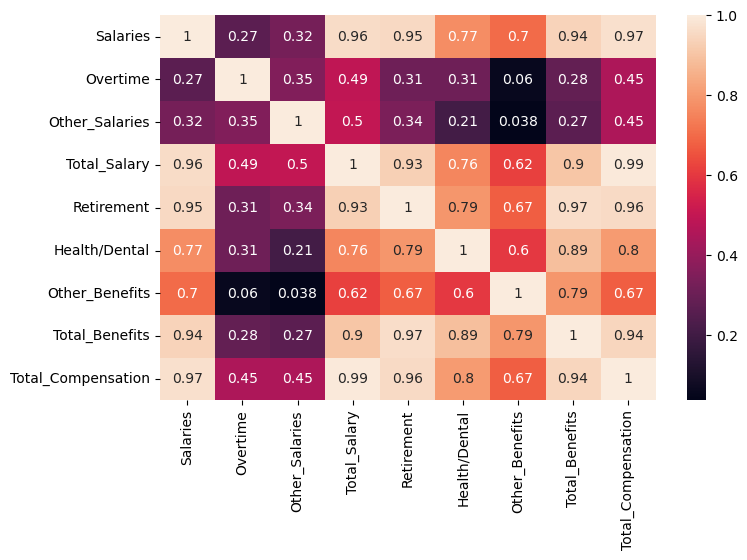

In [335]:
## graph
plt.figure(figsize=(8,5))
## plot the graph
sns.heatmap(df_num.corr(),annot=True)

<Axes: >

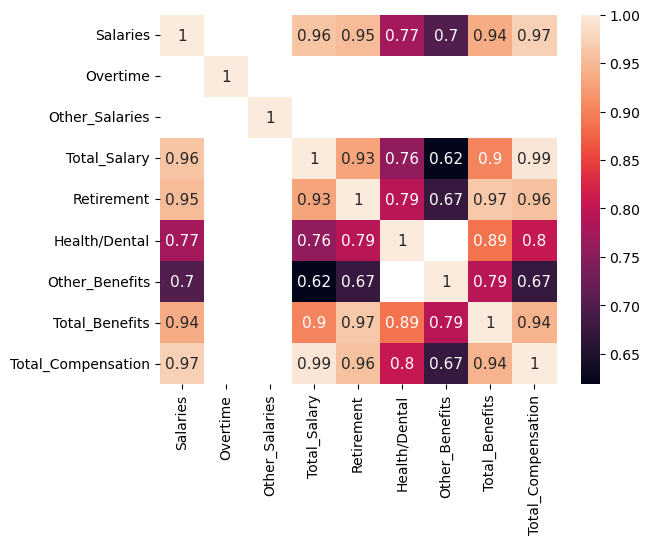

In [336]:
sns.heatmap(df_num.corr()[np.abs(df_num.corr()) > 0.6], annot = True, annot_kws = {"size": 11})

In [337]:
df_num=data.select_dtypes(include=np.number)
df_num.columns

Index(['Salaries', 'Overtime', 'Other_Salaries', 'Total_Salary', 'Retirement',
       'Health/Dental', 'Other_Benefits', 'Total_Benefits',
       'Total_Compensation'],
      dtype='object')

In [338]:
df_cat=data.select_dtypes(include=object)
df_cat.columns

Index(['Year_Type', 'Year'], dtype='object')

In [339]:
data.dtypes


Year_Type              object
Year                   object
Salaries              float64
Overtime              float64
Other_Salaries        float64
Total_Salary          float64
Retirement            float64
Health/Dental         float64
Other_Benefits        float64
Total_Benefits        float64
Total_Compensation    float64
dtype: object

In [340]:
data.head()

,Year_Type,Year,Salaries,Overtime,Other_Salaries,Total_Salary,Retirement,Health/Dental,Other_Benefits,Total_Benefits,Total_Compensation
0,Fiscal,2015,92288.22,267.45,267.45,92823.12,20700.20,12500.56,7605.75,40806.51,133629.63
1,Calendar,2015,1466.38,348.23,0.00,1814.61,0.00,442.03,141.59,583.62,2398.23
2,Fiscal,2014,76536.95,13583.72,10855.94,100976.61,18632.19,12464.61,8011.41,39108.21,140084.82
3,Fiscal,2014,45659.88,0.00,1625.37,47285.25,10081.20,0.00,3936.63,14017.83,61303.08
4,Fiscal,2013,41832.00,0.00,0.00,41832.00,7617.60,5908.52,3254.50,16780.62,58612.62


In [341]:
data.shape

(50000, 11)

In [342]:
## encode the categorical variables
encoded_data=pd.get_dummies(data=df_cat,drop_first=True,dtype=int)

## concat the dummy variables with numeric features

In [405]:
data=pd.concat([df_num,encoded_data],axis=1)
data.head()

,Salaries,Overtime,Other_Salaries,Total_Salary,Retirement,Health/Dental,Other_Benefits,Total_Benefits,Total_Compensation,Year_Type_Fiscal,Year_2014,Year_2015,Year_2016
0,92288.22,267.45,267.45,92823.12,20700.20,12500.56,7605.75,40806.51,133629.63,1,0,1,0
1,1466.38,348.23,0.00,1814.61,0.00,442.03,141.59,583.62,2398.23,0,0,1,0
2,76536.95,13583.72,10855.94,100976.61,18632.19,12464.61,8011.41,39108.21,140084.82,1,1,0,0
3,45659.88,0.00,1625.37,47285.25,10081.20,0.00,3936.63,14017.83,61303.08,1,1,0,0
4,41832.00,0.00,0.00,41832.00,7617.60,5908.52,3254.50,16780.62,58612.62,1,0,0,0


In [395]:
data.shape

(50000, 13)

## split the data into train or test sets

In [409]:
x_full=data.drop("Total_Compensation",axis=1)
y_full=data.Total_Compensation

## sm.add_constant(y=mx+c) to intercept the model
x_full=sm.add_constant(x_full)

x_train,x_test,y_train,y_test=train_test_split(x_full,y_full,test_size=0.3)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)


(35000, 13)
(15000, 13)
(35000,)
(15000,)


In [411]:
mlr_full_model=sm.OLS(y_train,x_train).fit()
mlr_full_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     Total_Compensation   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.422e+33
Date:                Sat, 16 Aug 2025   Prob (F-statistic):               0.00
Time:                        13:27:48   Log-Likelihood:             7.5411e+05
No. Observations:               35000   AIC:                        -1.508e+06
Df Residuals:                   34989   BIC:                        -1.508e+06
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             8.606e-11   1.71e-12     50.228      0.000    8.27e-11    8.94e-11
Salaries             0.2500   4.17e-17   5.99e+15      0.000       0.250       0.250
Overtime             0.2500   5.31e-17   4.71e+15      0.000       0.250       0.250
Other_Salaries       0.2500    7.3e-17   3.42e+15      0.000       0.250       0.250
Total_Salary         0.7500   2.53e-17   2.96e+16      0.000       0.750       0.750
Retirement           0.2500    1.9e-16   1.32e+15      0.000       0.250       0.250
Health/Dental        0.2500   1.85e-16   1.35e+15      0.000       0.250       0.250
Other_Benefits       0.2500   1.87e-16   1.34e+15      0.000       0.250       0.250
Total_Benefits       0.7500   7.72e-17   9.71e+15      0.000       0.750       0.750
Year_Type_Fiscal  1.046e-11   1.23e-12      8.486      0.000    8.04e-12    1.29e-11
Year_2014        -1.489e-11   1.56e-12     -9.542      0.000    -1.8e-11   -1.18e-11
Year_2015        -9.322e-12   1.55e-12     -6.017      0.000   -1.24e-11   -6.29e-12
Year_2016        -2.353e-11   1.93e-12    -12.187      0.000   -2.73e-11   -1.97e-11
==============================================================================
Omnibus:                     3823.856   Durbin-Watson:                   1.704
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             5331.668
Skew:                           0.868   Prob(JB):                         0.00
Kurtosis:                       3.803   Cond. No.                     1.80e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.63e-18. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [413]:
y_pred=mlr_full_model.predict(x_test)
y_pred

41033      4669.36
988      168247.39
25818     82564.43
16722      9930.26
6710     225725.91
24673     85657.87
35061    192531.02
29873     84928.13
34785     26385.82
46586      2309.68
7713      98129.55
10054     96131.51
6290      32592.19
24029    139139.35
24911     63989.60
33633    165827.98
28679     23271.51
12550      5705.11
40665    121887.68
29928    102160.03
864        2293.39
10975     48240.86
20569     64704.90
1014     180061.88
22905      5964.11
39967    106873.79
29088    155794.35
27144     14802.40
38626     99826.04
2881      72387.81
7738      55736.47
1005      34634.48
49828     23035.61
21582    160277.72
43672     19078.61
20557     44685.06
32740    195445.90
47766      1739.61
31509      2775.14
1336      82707.82
34743    166987.42
44645    123611.98
4690     175220.83
11949     74307.47
12074    166692.05
11837    156301.82
39060    162938.92
41677    108782.20
18058     44701.67
13269    145970.66
15948    125706.60
37006    174061.04
14566    125

In [415]:
df_feature.shape

(50000, 10)

In [423]:
data.drop(["Total_Salary","Retirement","Health/Dental","Other_Benefits"],axis=1,inplace=True)

In [435]:
data.head()

,Salaries,Overtime,Other_Salaries,Total_Benefits,Total_Compensation,Year_Type_Fiscal,Year_2014,Year_2015,Year_2016
0,0.648705,-0.369314,-0.456892,0.850618,0.528052,1,0,1,0
1,-1.377859,-0.362024,-0.492148,-1.537720,-1.405486,0,0,1,0
2,0.297237,0.832423,0.938918,0.749777,0.623161,1,1,0,0
3,-0.391742,-0.393450,-0.277886,-0.740029,-0.537594,1,1,0,0
4,-0.477156,-0.393450,-0.492148,-0.575981,-0.577234,1,0,0,0


In [437]:
data.iloc[:,0:4]=data.iloc[:,0:4].apply(lambda x:(x-x.mean())/x.std())
data.head()

,Salaries,Overtime,Other_Salaries,Total_Benefits,Total_Compensation,Year_Type_Fiscal,Year_2014,Year_2015,Year_2016
0,0.648705,-0.369314,-0.456892,0.850618,0.528052,1,0,1,0
1,-1.377859,-0.362024,-0.492148,-1.537720,-1.405486,0,0,1,0
2,0.297237,0.832423,0.938918,0.749777,0.623161,1,1,0,0
3,-0.391742,-0.393450,-0.277886,-0.740029,-0.537594,1,1,0,0
4,-0.477156,-0.393450,-0.492148,-0.575981,-0.577234,1,0,0,0


In [429]:
x_full=data.drop("Total_Compensation",axis=1)
y_full=data.Total_Compensation

## sm.add_constant(y=mx+c) to intercept the model
x_full=sm.add_constant(x_full)

x_train,x_test,y_train,y_test=train_test_split(x_full,y_full,test_size=0.3)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)


(35000, 9)
(15000, 9)
(35000,)
(15000,)


In [431]:
mlr_model_without_corr=sm.OLS(y_train,x_train).fit()
mlr_model_without_corr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     Total_Compensation   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 2.663e+33
Date:                Sat, 16 Aug 2025   Prob (F-statistic):               0.00
Time:                        13:43:53   Log-Likelihood:             1.1505e+06
No. Observations:               35000   AIC:                        -2.301e+06
Df Residuals:                   34991   BIC:                        -2.301e+06
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             2.611e-16   1.51e-17     17.281      0.000    2.31e-16    2.91e-16
Salaries             0.6603   2.03e-17   3.25e+16      0.000       0.660       0.660
Overtime             0.1633   7.49e-18   2.18e+16      0.000       0.163       0.163
Other_Salaries       0.1118   7.49e-18   1.49e+16      0.000       0.112       0.112
Total_Benefits       0.2481   2.02e-17   1.23e+16      0.000       0.248       0.248
Year_Type_Fiscal -3.964e-16   1.49e-17    -26.599      0.000   -4.26e-16   -3.67e-16
Year_2014        -9.272e-16   1.86e-17    -49.957      0.000   -9.64e-16   -8.91e-16
Year_2015        -7.598e-16   1.83e-17    -41.548      0.000   -7.96e-16   -7.24e-16
Year_2016         1.162e-16   2.32e-17      5.007      0.000    7.07e-17    1.62e-16
==============================================================================
Omnibus:                     3342.998   Durbin-Watson:                   1.695
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4621.566
Skew:                           0.776   Prob(JB):                         0.00
Kurtosis:                       3.870   Cond. No.                         6.64
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [433]:
y_pred=mlr_model_without_corr.predict(x_test)
y_pred.head(10)

22789   -0.133283
45362    0.086606
33504    0.399241
38163    0.055332
26170    0.346334
21605   -1.355037
36543   -0.029163
3373     1.172850
23786   -0.233621
42417    0.932276
dtype: float64

In [443]:
rmse=np.sqrt(mean_squared_error(y_test,y_pred))
print(rmse)

1.2583022169670684e-15
